## Capstone Project - Startup Investments

### Part 2 - Exploratory Data Analysis

In [1]:
## Data handling Libraries ###

import pandas as pd
import numpy as np

## Plotting Libraries ###
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

## Date Time ###
import datetime
import time
import pytz

### Warnings ###
import warnings
warnings.filterwarnings('ignore')

### Progress Bar ###
from tqdm import tqdm

### Model Building, Model Evaluvation, Model Preprocessing ###
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,RepeatedStratifiedKFold,StratifiedKFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import VarianceThreshold,RFECV

### Models Imbalance #

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# ML MODELS #

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier

# Scoring Dependancies #

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score 
# from sklearn.metrics import average_precision_score,make_scorer
from sklearn.model_selection import cross_val_score, cross_validate, KFold
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

# Models Saving #

import pickle

# Other #
from collections import Counter
from sklearn.utils import shuffle

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)

In [3]:
df = pd.read_csv('../dataset/data_cleaning.csv')

In [4]:
df_ori = pd.read_csv('../dataset/data_cleaning.csv')

In [5]:
df.shape

(39802, 34)

#### Constant

In [6]:
LISTCOLUMNNAME= []
LISTFUNDINGCOL = ['seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39802 entries, 0 to 39801
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   homepage_url          37524 non-null  object 
 1   category_list         37592 non-null  object 
 2   market                37587 non-null  object 
 3   status                39802 non-null  object 
 4   country_code          39802 non-null  object 
 5   region                39802 non-null  object 
 6   funding_rounds        39802 non-null  float64
 7   founded_at            31441 non-null  object 
 8   founded_month         31375 non-null  object 
 9   founded_quarter       31375 non-null  object 
 10  founded_year          31375 non-null  float64
 11  first_funding_at      39802 non-null  object 
 12  last_funding_at       39802 non-null  object 
 13  seed                  39802 non-null  float64
 14  venture               39802 non-null  float64
 15  equity_crowdfunding

#### Imbalanced Data set

From the above graph, we can see that the data set is a highly imbalanced data set i.e. at least one of the classes dominate over others. If we encounter a highly imbalanced data set, accuracy will not be the best metric to evaluate the performance of the model since accuracy score will be high even if our model predicts that all the unseen data belongs to the majority class. Hence, we need to evaluate the True Positive Rate (Recall), False Positive Rate (Specificity), Precession or F1-Score depending on the problem statement.

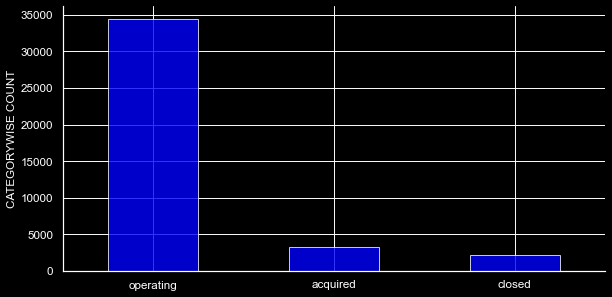

In [8]:
### Imbalanced Dataset ###

plt.figure(figsize = (10,5), facecolor = 'black', dpi=70)
sns.set(rc={'axes.facecolor':'black', 
            'figure.facecolor':'black', 
            'axes.spines.top': False
            })

ax = df['status'].value_counts(dropna = False).plot(kind='bar', color = 'blue', alpha = 0.8)
ax.set_xlabel('')
ax.set_ylabel('CATEGORYWISE COUNT')
ax.set()
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white',labelsize=12)
ax.tick_params(axis='y', colors='white',labelsize=12)
ax.tick_params(axis='y', colors='white')
sns.despine()
plt.xticks(rotation=0)
plt.show()

#### Category wise Median Funding Value

The below graph helps us to know the median funding value received by each of the classes (“Operating”, “Closed”, “Acquired”). My hypothesis is that the median funding value will be the highest for “Operating” category followed by “Acquired” and “Closed” categories. From the below graph we can see some interesting patterns such as

- The median funding value received from Seed/ Angel investors is highest for “closed” category. I think angel investors might need to do a bit more research before investing in a startup. But we need to also keep in mind that “higher the risk higher the reward”.

- The median funding value received from “round A”, “round B”, “round C”, “round D”, “post ipo equity”, “venture” and “undisclosed” funding is the highest for “acquired” category. Can we say that startups that receive high initial round funding’s will eventually be acquired by industry giants? Looking at the pattern I think that is what has happened.

- The median funding value received from “round H” funding is zero for “closed” and “acquired” category.

['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']


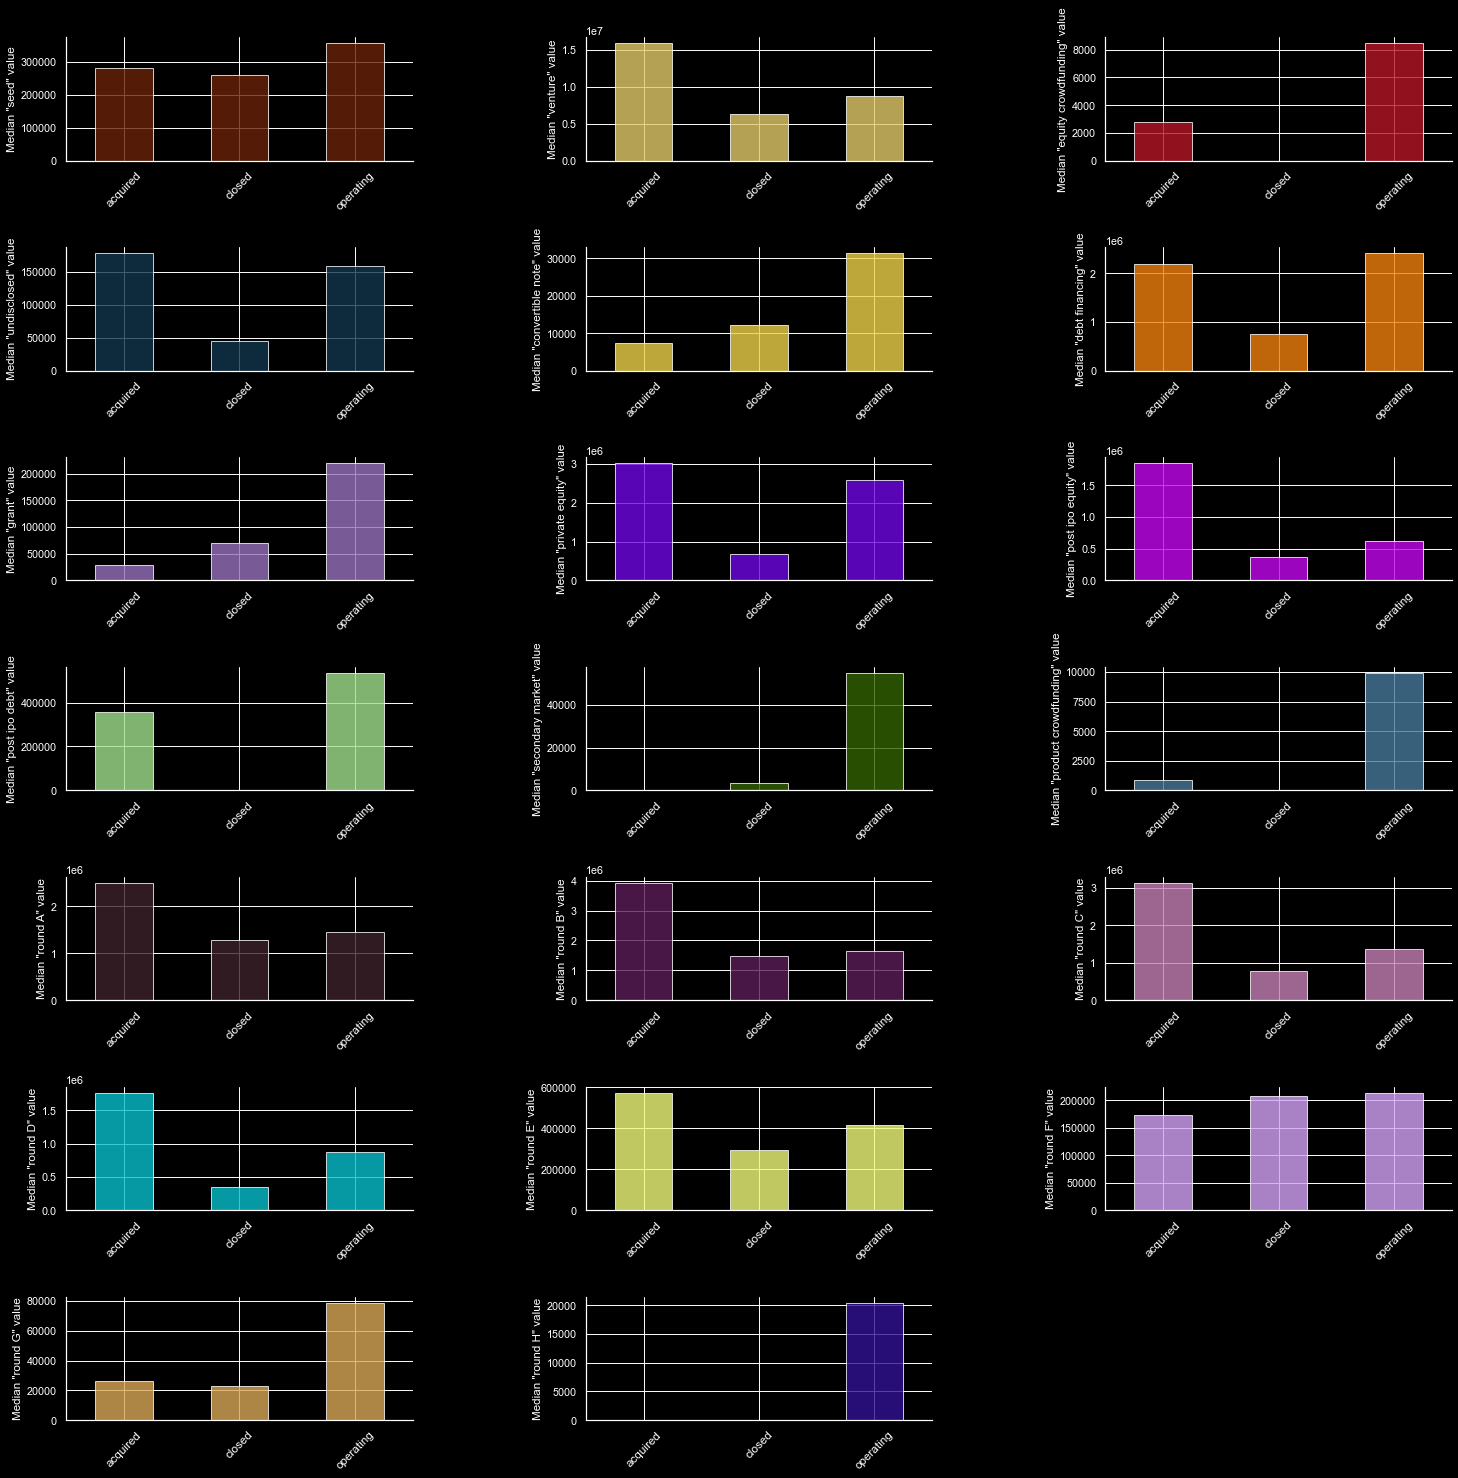

In [9]:
### Status VS Fundings ###

print(LISTFUNDINGCOL)

fig = plt.figure(figsize = (21,21), facecolor = 'black', dpi=70) 

for c,num in zip(LISTFUNDINGCOL, range(1,22)):
  ax = fig.add_subplot(7,3,num)
  x = np.random.rand()
  y = np.random.rand()
  z = np.random.rand()
  ax =  df.groupby('status')[c].agg('mean').plot(kind='bar',alpha = .8, color=(x,y,z))

  ax.set_xlabel('')
  temp = 'Median "' + c.replace('_',' ') + '" value'
  ax.set_ylabel(temp)
  ax.set_title('')
  ax.xaxis.label.set_color('white')
  ax.yaxis.label.set_color('white')
  ax.tick_params(axis='x', colors='white',labelsize=12)
  ax.tick_params(axis='y', colors='white')
  sns.despine()
  plt.xticks(rotation=45)

plt.tight_layout()
plt.subplots_adjust(hspace=0.7, wspace = 0.5)

#### Feature Coorelation

Feature correlation helps us to know how two features are correlated with each other. Correlation magnitude tells us the strength of the relationship and correlation’s sign tells us the direction of the relationship.


Random Forest classifier is not influenced by multi-collinearity since we randomly pick only a subset of features for building our tress in Random Forest model and hence, I have not treated multi-collinearity issue for this project. Just as a tip, generally you check for correlation between two columns and if it is above a certain threshold value you would drop any one of the highly correlated column.

In [10]:
def funcHeatMap(funcpX, funcpY, funcpSize):
  '''
  This function creates a custom heatmap.
  Please refer https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec for in depth explanation of this function.
  '''

  fig, ax = plt.subplots()
  
  # Mapping from column names to integer coordinates
  x_labels = [v for v in sorted(funcpX.unique())]
  y_labels = [v for v in sorted(funcpY.unique())]
  x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
  y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
  
  size_scale = 270
  ax.scatter(
      x=funcpX.map(x_to_num), # Use mapping for x
      y=funcpY.map(y_to_num), # Use mapping for y
      s=funcpSize * size_scale, # Vector of square sizes, proportional to size parameter 
      c='blue',
      alpha=0.8,
      marker='s' # Use square as scatterplot marker
  )
  
  # Show column labels on the axes
  ax.set_xticks([x_to_num[v] for v in x_labels])
  listTempXLabel = [name.replace('_', ' ') for name in x_labels]
  ax.set_xticklabels(listTempXLabel, rotation=90, horizontalalignment='right')
  ax.set_yticks([y_to_num[v] for v in y_labels])
  listTempYLabel = [name.replace('_', ' ') for name in y_labels]
  ax.set_yticklabels(listTempYLabel)
  ax.tick_params(axis='x', colors='white',labelsize=12)
  ax.tick_params(axis='y', colors='white')
  ax.grid(False, 'major')
  ax.grid(True, 'minor')
  ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
  ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
  ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
  ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])

The below custom heat-map takes only the strength into consideration

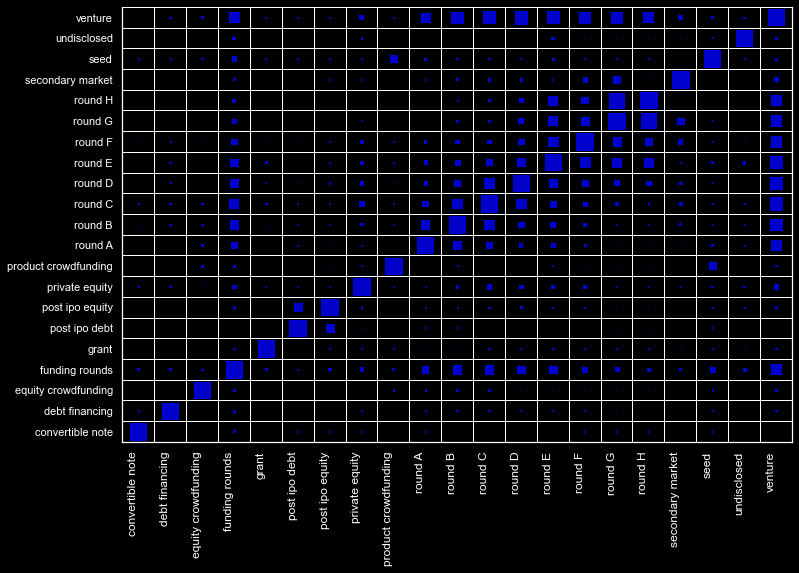

In [11]:
### Correlation HeatMap ###

listTempCol = LISTFUNDINGCOL.copy()
listTempCol.append('funding_rounds')
corr = df[listTempCol].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
funcHeatMap(
    funcpX=corr['x'],
    funcpY=corr['y'],
    funcpSize=corr['value'].abs()
)

## Feature Engineering

#### Date Feature Variables

While performing descriptive analysis (finding datatype, mean, median, max etc. of a feature variable) I found that date columns such as “founded_at”, “first_funding_at” etc. were of object datatype instead of date-time datatype and when I was trying to change the datatype I encountered few errors due to data anomaly which had to be addressed before changing its datatype.

1. One of the records had the year as 1636 for “founded_at” feature variable and I have dropped this record (row) from our analysis since I am pretty sure that this might be a data entry mistake — I don’t think we will have information about a startup founded in the year 1636.

In [12]:
### Found out while converting the object type to date type ###

wrongDateCount = df.loc[df['founded_at'].str.contains('1636', na=False),].shape[0]
print(f'There are {wrongDateCount} record(s) whose year is 1636')
df = df.loc[~df['founded_at'].str.contains('1636', na=False),]

There are 1 record(s) whose year is 1636


2. Few of the records in “first_funding_at” feature variable was in “00dd-mm-yy” format. The record needs to be in “dd-mm-yyyy” format for changing the datatype from object datatype to date-time datatype. 

In [13]:
### Date preprocessing ###

def funcDateManipulation(fncpDF, fncpColName, funcStartsWith='00'):
    '''
    The expected date format is yyyy-mm-dd but few of the dates are not in this format. This function changes the value to the / 
    specified format. The startsWith searches for all the dates that begin with 00 and modifies them into the required format.
    
    input: 
        DataFrame
        (str) fncpColName, 
        (str) (optional) funcStartsWith
    output: 
        None
    '''
    print(f'Processing column {fncpColName}....')
    lstTemp = fncpDF.loc[fncpDF[fncpColName].str.startswith(funcStartsWith, na=False), [fncpColName]].values.tolist()
    print(lstTemp)
    for dte in lstTemp:
        year = str(dte[0][-2:])
        month = str(dte[0][5:7])
        day = str(dte[0][2:4])
        newDate = '20'+year+'-'+month+'-'+day
        fncpDF.loc[fncpDF[fncpColName].str.contains(dte[0], na=False),[fncpColName]] = newDate
    print(f'Sucessfully changed the date for {fncpColName} variable')

In [14]:
print(df.loc[df['first_funding_at'].str.startswith('00', na=False), ['first_funding_at']])
print('\n')
funcDateManipulation(df, 'first_funding_at')
print('\n')
print(df.loc[df['last_funding_at'].str.startswith('00', na=False), ['last_funding_at']])
print('\n')
funcDateManipulation(df, 'last_funding_at')

      first_funding_at
23879       0007-05-13
30079       0011-11-14


Processing column first_funding_at....
[['0007-05-13'], ['0011-11-14']]
Sucessfully changed the date for first_funding_at variable


Empty DataFrame
Columns: [last_funding_at]
Index: []


Processing column last_funding_at....
[]
Sucessfully changed the date for last_funding_at variable


#### Market Feature Variable

1. The below block of code checks for missing values in the market variable and replaces the values as “Unknown”.

In [15]:
### Market variable ###
 
df['market'] = df['market'].str.strip() 
market_na_values = df.loc[(df['market'].isna() == True),].shape[0]
print(f'There are in total {market_na_values} rows for which the market has NaN value')
df.loc[(df['market'].isna() == True),['market']] = 'Unknown' # Replacing NaN as UnKnown

There are in total 2215 rows for which the market has NaN value


2. There are in total 735 unique values in “market” feature. The below block of code one-hot encodes only the top five, middle ten and bottom five most occurring categories out of the total 735 categories in the “market” feature and drops the original “market” feature from analysis.

In [16]:
df['market'].value_counts().head(10)

Software               3971
Biotechnology          3423
Unknown                2215
Mobile                 1679
E-Commerce             1403
Curated Web            1316
Enterprise Software    1115
Health Care            1096
Clean Technology       1033
Hardware + Software     980
Name: market, dtype: int64

I have implemented this approach for this project and if you ask me why, I felt it makes more sense to just include the top, mid and bottom most occurring variables into my analysis since some of the unique categories have a value count of one.

In [17]:
def funcCustomOneHotEncode(fncpDF, fncpColName,fncpTop=5, fncpBottom=5, fncpMiddle=10, fncpDropOriginal=True):
    
    '''
    This function takes the fncpTop, fncpMiddledle and fncpBottom most occuring values in a feature and one hot encodes the values.
    input: 
        DataFrame, 
        (str) Variable/Feature,
        (int) (optional) fncpTop n categories, 
        (int) (optional) fncpBottom n categories, 
        (int) (optional) fncpMiddle n categories, 
        (bool) (optional) To drop original variable
    output: 
        1 (Success) 
        -1 (Failure)
    '''
    
    if fncpColName not in fncpDF.columns:
        return -1
    
    uniqueMarketsCount = len(fncpDF[fncpColName].unique())
    print(f'There are in total {uniqueMarketsCount} unique categories in {fncpColName} feature \n')

    # Top X
    listfncpTopXCategories = []
    listfncpTopXCategories = fncpDF[fncpColName].value_counts().sort_values(ascending = False).head(fncpTop).index.tolist()
    if 'Unknown' in listfncpTopXCategories:
        listfncpTopXCategories = fncpDF[fncpColName].value_counts().sort_values(ascending = False).head(fncpTop + 1).index.tolist()
        listfncpTopXCategories.remove('Unknown') # Removing the 'Unknown' market since it is a imputed value
    print(f'fncpTop {len(listfncpTopXCategories)} markets are:\n ')
    print({*listfncpTopXCategories}, sep = ", ")

    # Mid X
    listfncpMiddleXCategories = []
    startPos = int(uniqueMarketsCount/2)
    endPos = startPos + fncpMiddle
    listfncpMiddleXCategories = fncpDF[fncpColName].value_counts().sort_values(ascending = True)[startPos:endPos].index.tolist()
    if 'Unknown' in listfncpMiddleXCategories:
        listfncpMiddleXCategories = fncpDF[fncpColName].value_counts().sort_values(ascending = True)[startPos:endPos + 1].index.tolist()        
        listfncpMiddleXCategories.remove('Unknown') # Removing the 'Unknown' market since it is a imputed value
    print(f'\nfncpMiddle {len(listfncpMiddleXCategories)} markets are:\n ')
    print({*listfncpMiddleXCategories}, sep = ", ")

    # Bottom X
    listfncpBottomXCategories = []
    listfncpBottomXCategories = fncpDF[fncpColName].value_counts().sort_values(ascending = True).head(fncpBottom).index.tolist()
    if 'Unknown' in listfncpTopXCategories:
        listfncpBottomXCategories = fncpDF[fncpColName].value_counts().sort_values(ascending = True).head(fncpBottom + 1).index.tolist()
        listfncpBottomXCategories.remove('Unknown') # Removing the 'Unknown' market since it is a imputed value
    print(f'\nfncpBottom {len(listfncpBottomXCategories)} markets are:\n ')
    print({*listfncpBottomXCategories}, sep = ", ")

    listFinalXCategories = listfncpTopXCategories + listfncpMiddleXCategories + listfncpBottomXCategories
    for label in listFinalXCategories:
      fncpDF['f_'+fncpColName+'_'+label] = np.where(fncpDF[fncpColName] == label,1,0)
    
    if fncpDropOriginal == True:
        fncpDF.drop(fncpColName, axis=1, inplace=True)
    print(f'Sucessfully implemented custom one hot encoding for {fncpColName} variable...')
    return listFinalXCategories

In [18]:
### Market variable selecting only top 5, bottom 5 and mid 10 and one-hot encoding###

market_variableOneHotCol = funcCustomOneHotEncode(df, 'market')

There are in total 735 unique categories in market feature 

fncpTop 5 markets are:
 
{'E-Commerce', 'Mobile', 'Biotechnology', 'Curated Web', 'Software'}

fncpMiddle 10 markets are:
 
{'Content Creators', 'Unifed Communications', 'Textbooks', 'Tech Field Support', 'Social Bookmarking', 'Oil', 'Digital Signage', 'Polling', 'Mass Customization', 'QR Codes'}

fncpBottom 5 markets are:
 
{'Email Newsletters', 'Homeland Security', 'Motors', 'Local Commerce', 'Cable'}
Sucessfully implemented custom one hot encoding for market variable...


#### Region variables

There are in total 111 unique values in “country_code” feature and there are in total 1030 unique values in “region” feature. The below block of code one-hot encodes only the top five, middle ten and bottom five most occurring categories in “country_code” feature variable and “region” feature variable and drops the original feature.

In [19]:
df['country_code'].value_counts().head(10)

USA        24006
Unknown     3663
GBR         2242
CAN         1113
CHN          981
FRA          751
IND          630
DEU          612
ISR          597
ESP          442
Name: country_code, dtype: int64

In [20]:
### country_code variable selecting only top 5, bottom 5 and mid 10 and one-hot encoding###

country_code_variableOneHotCol = funcCustomOneHotEncode(df, 'country_code')

There are in total 111 unique categories in country_code feature 

fncpTop 5 markets are:
 
{'FRA', 'GBR', 'USA', 'CAN', 'CHN'}

fncpMiddle 10 markets are:
 
{'KEN', 'DZA', 'PER', 'NGA', 'LUX', 'PHL', 'EGY', 'ROM', 'COL', 'LTU'}

fncpBottom 5 markets are:
 
{'SOM', 'OMN', 'MUS', 'MKD', 'CIV'}
Sucessfully implemented custom one hot encoding for country_code variable...


In [21]:
df['region'].value_counts().head(10)

SF Bay Area         5897
Unknown             3663
New York City       2188
Boston              1670
London              1326
Los Angeles         1125
Seattle              824
Washington, D.C.     683
San Diego            615
Chicago              614
Name: region, dtype: int64

In [22]:
### region variable selecting only top 5, bottom 5 and mid 10 and one-hot encoding###

region_variableOneHotCol = funcCustomOneHotEncode(df, 'region')

There are in total 1030 unique categories in region feature 

fncpTop 5 markets are:
 
{'Boston', 'New York City', 'SF Bay Area', 'Los Angeles', 'London'}

fncpMiddle 10 markets are:
 
{'Essex', 'Zhengzhou', 'Martinsried', 'Northampton', 'Warwick', 'Vejle', 'Dortmund', 'Medellin', 'Orsay', 'Westmount'}

fncpBottom 5 markets are:
 
{'Monheim', 'Tarragona', 'Terni', 'Cordoba', 'Thiruvananthapuram'}
Sucessfully implemented custom one hot encoding for region variable...


#### Funding Rounds

There were **15868 records** for which the actual number of funding rounds raised by an startup did not match the “funding_rounds” feature value Ex: If a startup had raised funds from “seed” funding, “venture” funding and “round A” funding, then the “funding_rounds” value for this startup needs to be three but in some cases the value was not three and the below block of code helps us to resolve this issue.

In [23]:
def funcColumnsToDrop(data, drop_list = []):
    
    '''
    This function drops a list of column(s) in the dataframe and returns the new unique columns in the dataframe
    input: Dataframe, list of coulumns to drop
    output: list of new columns (Sucess) / -1 (Failure)
    '''
    
    if len(drop_list) > 0 and set(drop_list).issubset(data.columns):
        data.drop(drop_list, axis=1, inplace=True) 
        return data.columns
    else:
        print('No columns to drop or one of the columns present in the list is not available in the dataframe')
        return -1

In [24]:
### Correcting total funding_rounds ###

lstCol = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 
       'convertible_note', 'debt_financing', 'grant', 'private_equity', 'post_ipo_equity', 
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']
    
print('The list of variables associated with funding are \n', LISTFUNDINGCOL)
df['r_Count']=df.loc[:,lstCol].ge(1).sum(axis=1) # Counts the value across the rows only if the value is greater than 1 only
incorrectcount = df.loc[df['r_Count'] != df['funding_rounds'], ['r_Count', 'funding_rounds']].shape[0]
print(f'\nThere are {incorrectcount} rows whose to funding rounds do not match with the actual funding rounds')
df['funding_rounds'] = df['r_Count']

lstDropColumns = ['r_Count']
LISTCOLUMNNAME = funcColumnsToDrop(df, lstDropColumns)

The list of variables associated with funding are 
 ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']

There are 15868 rows whose to funding rounds do not match with the actual funding rounds


#### Handling Outliers

Outliers are extreme values in a feature and they are of two types

1. Genuine outliers Ex: While analyzing sales transaction you might encounter a high sale value transaction that was made by a customer who is into wholesale business. This needs to be treated as a genuine outlier and we need to separate all such transactions and build a separate model for them .

2. Unreal outliers Ex: Error in data due to data entry error, sensor error, calculation error etc. These records need to be dropped from our analysis or their values need to be capped or imputed.

One of the advantages of Random Forest is that this model is not affected by outliers since Random Forests uses trees that split the data into groups (repeatedly) according to whether a case is above or below a selected threshold value — hence it does not matter how much higher or lower an value is than the threshold value. Please do remember that few of the models such as regression models and distance-based models such as KNN algorithm are highly influenced by outliers.

Just for demonstration purpose the below block of code helps to impute the lower extreme value to be the same as the first quantile value and the higher extreme value to be the same as the third quantile value. Surprisingly, there were no outliers in this data set.

In [25]:
### Handling outliers if any exist in int and float datatypes ###

dictOutlierTuple = {}

for col in df.columns:
    if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
        percentiles = df[col].quantile([.25, .75]).values
        lowerQuantileValue = percentiles[0]
        upperQuantileValue = percentiles[1]
        df.loc[df[col] < lowerQuantileValue,col] = lowerQuantileValue
        lowCount = df.loc[df[col] < lowerQuantileValue,col].shape[0]
        df.loc[df[col] > upperQuantileValue, col] = upperQuantileValue
        highCount = df.loc[df[col] > upperQuantileValue, col].shape[0]
        dictOutlierTuple[col] = (lowerQuantileValue, upperQuantileValue, lowCount, highCount)
print(f'Rows affected (LowerQuantile Value, UpperQuantlie Value, LowerQuantlie Rows, Upperquantile Rows)\n\n {dictOutlierTuple}')

Rows affected (LowerQuantile Value, UpperQuantlie Value, LowerQuantlie Rows, Upperquantile Rows)

 {'funding_rounds': (1.0, 2.0, 0, 0), 'founded_year': (2005.0, 2012.0, 0, 0), 'seed': (0.0, 191876.0, 0, 0), 'venture': (0.0, 7000000.0, 0, 0), 'equity_crowdfunding': (0.0, 0.0, 0, 0), 'undisclosed': (0.0, 0.0, 0, 0), 'convertible_note': (0.0, 0.0, 0, 0), 'debt_financing': (0.0, 0.0, 0, 0), 'grant': (0.0, 0.0, 0, 0), 'private_equity': (0.0, 0.0, 0, 0), 'post_ipo_equity': (0.0, 0.0, 0, 0), 'post_ipo_debt': (0.0, 0.0, 0, 0), 'secondary_market': (0.0, 0.0, 0, 0), 'product_crowdfunding': (0.0, 0.0, 0, 0), 'round_A': (0.0, 0.0, 0, 0), 'round_B': (0.0, 0.0, 0, 0), 'round_C': (0.0, 0.0, 0, 0), 'round_D': (0.0, 0.0, 0, 0), 'round_E': (0.0, 0.0, 0, 0), 'round_F': (0.0, 0.0, 0, 0), 'round_G': (0.0, 0.0, 0, 0), 'round_H': (0.0, 0.0, 0, 0), 'f_SumCol': (257592.0, 14000000.0, 0, 0), 'f_market_Software': (0.0, 0.0, 0, 0), 'f_market_Biotechnology': (0.0, 0.0, 0, 0), 'f_market_Mobile': (0.0, 0.0, 0, 0), '

In [26]:
dictOutlierTuple

{'funding_rounds': (1.0, 2.0, 0, 0),
 'founded_year': (2005.0, 2012.0, 0, 0),
 'seed': (0.0, 191876.0, 0, 0),
 'venture': (0.0, 7000000.0, 0, 0),
 'equity_crowdfunding': (0.0, 0.0, 0, 0),
 'undisclosed': (0.0, 0.0, 0, 0),
 'convertible_note': (0.0, 0.0, 0, 0),
 'debt_financing': (0.0, 0.0, 0, 0),
 'grant': (0.0, 0.0, 0, 0),
 'private_equity': (0.0, 0.0, 0, 0),
 'post_ipo_equity': (0.0, 0.0, 0, 0),
 'post_ipo_debt': (0.0, 0.0, 0, 0),
 'secondary_market': (0.0, 0.0, 0, 0),
 'product_crowdfunding': (0.0, 0.0, 0, 0),
 'round_A': (0.0, 0.0, 0, 0),
 'round_B': (0.0, 0.0, 0, 0),
 'round_C': (0.0, 0.0, 0, 0),
 'round_D': (0.0, 0.0, 0, 0),
 'round_E': (0.0, 0.0, 0, 0),
 'round_F': (0.0, 0.0, 0, 0),
 'round_G': (0.0, 0.0, 0, 0),
 'round_H': (0.0, 0.0, 0, 0),
 'f_SumCol': (257592.0, 14000000.0, 0, 0),
 'f_market_Software': (0.0, 0.0, 0, 0),
 'f_market_Biotechnology': (0.0, 0.0, 0, 0),
 'f_market_Mobile': (0.0, 0.0, 0, 0),
 'f_market_E-Commerce': (0.0, 0.0, 0, 0),
 'f_market_Curated Web': (0.0, 0.

#### Category Lists

“Category_list” variable tells the list of categories under which a startup fall. Since this variable is of object data type, we need to change it into numerical datatype. One approach would be to split the list and one hot encode the values and the other approach is to simply check if a startup falls in a single category or multiple categories and accordingly create a new binary feature which tells whether the startup belongs to a single category or multiple categories. I have taken the later approach since I want to avoid curse of dimensionality and also to show other approaches that can be taken for dealing features that are of object datatype.

The below block of code creates a new binary feature to tell whether a startup belongs to single category or multiple categories.

In [27]:
### Replaces NaN with single pipe and then checks the number of pipes in the string. If greater than two multi category 
### is marked as 1 and if not marked as 0.

df.loc[df['category_list'].isna() == True,['category_list']] = '|'
df['f_Multi_Category'] = [1 if x.count('|') > 2 else 0 for x in df['category_list']] 

lstDropColumns = ['category_list'] 
LISTCOLUMNNAME = funcColumnsToDrop(df, lstDropColumns)

#### Homepage URL

Earlier I had explained regarding extracting domain information from the website to know the intended purpose of a startup but for this project since we already have some basic information such as market to which the startup caters to and region to which an startup belongs to, I have simply created a binary feature that tells whether a startup has a website associated with it or not. Just as a tip we can also check how long does it take to load the startup’s website which might give us some light about the quality of their developer team.

In [28]:
df.loc[df['homepage_url'].isna() == True,['homepage_url']] = 'NAN'
df['f_URL'] = [1 if len(x) > 3 else 0 for x in df['homepage_url']]

lstDropColumns = ['homepage_url'] 
LISTCOLUMNNAME = funcColumnsToDrop(df, lstDropColumns)

In [29]:
df['f_URL']

0        1
1        1
2        1
3        1
4        0
        ..
39797    1
39798    1
39799    1
39800    1
39801    1
Name: f_URL, Length: 39801, dtype: int64

#### Year Related Columns

We can generate some useful features (derived features) using the date-time feature variables which might help our model to precisely classify a target variable

In [30]:
### Checking to impute founded year using the other coulmns

print(df.loc[((df['founded_month'].isna() == False) & (df['founded_at'].isna() == True)) ,['founded_at','founded_month']])
print('\n')
print(df.loc[((df['founded_quarter'].isna() == False) & (df['founded_at'].isna() == True)) ,['founded_at', 'founded_quarter']])
print('\n')
print(df.loc[((df['founded_year'].isna() == False) & (df['founded_at'].isna() == True)) ,['founded_at', 'founded_year']])

Empty DataFrame
Columns: [founded_at, founded_month]
Index: []


Empty DataFrame
Columns: [founded_at, founded_quarter]
Index: []


Empty DataFrame
Columns: [founded_at, founded_year]
Index: []


1. The below block of code calculates the age of a startup and removes all the startups whose age is greater than 30 years or less than zero. I have included this age condition because even if we hold data about a startup that is more than 30 years old, I think it won’t be relevant to include those startups for our model building to predict the status of a startup that was established recently.

In [31]:
### Calculating the age of the company and removing all the companies whose age is greater than 30 years

df['r_first_funding_year'] = pd.DatetimeIndex(df['first_funding_at']).year
df['r_last_funding_year'] = pd.DatetimeIndex(df['last_funding_at']).year
df['r_founded_year'] = pd.DatetimeIndex(df['founded_at']).year

df['r_diff'] = df['r_first_funding_year'] - df['r_founded_year']
df['r_diff_mean'] = round(df['r_diff'].mean(skipna=True),0)
df.loc[df['r_founded_year'].isna() == True,['r_founded_year']] = df['r_first_funding_year'] - df['r_diff_mean']

df['f_age'] = 2021 - df['r_founded_year']
ageCondRows = df.loc[((df['f_age'] > 30) | (df['f_age'] < 0)),].shape[0]
print(f'There are {ageCondRows} whose age is greater than 30 or less than zero')
df = df.loc[((df['f_age'] <= 30) & (df['f_age'] >= 0)),]

There are 881 whose age is greater than 30 or less than zero


2. The below block of code

- First changes the value of “r_first_funding_year” feature variable (a temporary feature that was created by extracting the year part from “first_funding_at” feature) to be the same as “r_founded_year” feature variable (a temporary feature that was created by extracting the year part from “founded_year” feature) for all the records whose “r_first_funding_year” was less than “r_founded_year” — I don’t think a startup can raise funds before it was established.

- Second creates a new feature that gives us the number of years it took for the startup to raise its first funding.

In [32]:
### Changing the 'first funding year' whose value is less than 'founded year' to be the same as 'founded year' ###

df.loc[df['r_first_funding_year'] < df['r_founded_year'],['r_first_funding_year']] = df['r_founded_year']
df['f_yearstoFirstFunding'] = df['r_first_funding_year'] - df['r_founded_year']

3. The below block of code

- First changes the value of “r_last_funding_year” (a temporary feature that was created by extracting the year part from “last_funding_at” feature) to be the same as “r_first_funding_year” for all the records whose “r_last_funding_year” was less than “r_first_funding_year” — logically the last funding year should be later to first funding year.

- Second creates a new feature that gives us the number of years between the first funding year and last funding year.


In [33]:
### Changing the 'last funding year' whose value is less than 'first funding year' to be the same as 'first funding year' ###

df.loc[df['r_last_funding_year'] < df['r_first_funding_year'] ,['r_last_funding_year']] = df['r_first_funding_year']
df['f_FirstFundingToLastFunding'] = df['r_last_funding_year'] - df['r_first_funding_year']

In [34]:
### Dropping columns related to dates ###

lstDropColumns = ['r_first_funding_year', 'r_last_funding_year', 'r_founded_year', 'r_diff', 'r_diff_mean', 'founded_at', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at','last_funding_at']
LISTCOLUMNNAME = funcColumnsToDrop(df, lstDropColumns)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38920 entries, 0 to 39801
Data columns (total 88 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   status                          38920 non-null  object 
 1   funding_rounds                  38920 non-null  float64
 2   seed                            38920 non-null  float64
 3   venture                         38920 non-null  float64
 4   equity_crowdfunding             38920 non-null  float64
 5   undisclosed                     38920 non-null  float64
 6   convertible_note                38920 non-null  float64
 7   debt_financing                  38920 non-null  float64
 8   grant                           38920 non-null  float64
 9   private_equity                  38920 non-null  float64
 10  post_ipo_equity                 38920 non-null  float64
 11  post_ipo_debt                   38920 non-null  float64
 12  secondary_market                

In [36]:
#Exporting Data Cleaning to .CSV
df.to_csv('../dataset/data_eda.csv', index = False)